Q2.(a)
We have $\frac{da}{dt} = 0.005b(t)-0.05a(t), \frac{db}{dt} = 0.05a(t)+0.4c(t)-0.705b(t), \frac{dc}{dt}=0.7b(t)-0.4c(t)$. Given $a(0)=1.5, b(0)=3, c(0)=2$

In [47]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

In [48]:
def system(t, y):
    dydt = [0.005*y[1]-0.05*y[0], 0.05*y[0]+0.4*y[2]-0.705*y[1], 0.7*y[1]-0.4*y[2]]
    return dydt

In [49]:
y0 = [1.5, 3, 2]  # Initial conditions for y1 and y2
t_span1 = (0, 20)  # Time span from 0 to 10
t_span2 = (0, 1)

In [50]:
solution1 = solve_ivp(system, t_span1, y0, t_eval=np.linspace(0, 20, 100))
solution2 = solve_ivp(system, t_span2, y0, t_eval=np.linspace(0, 1, 100))

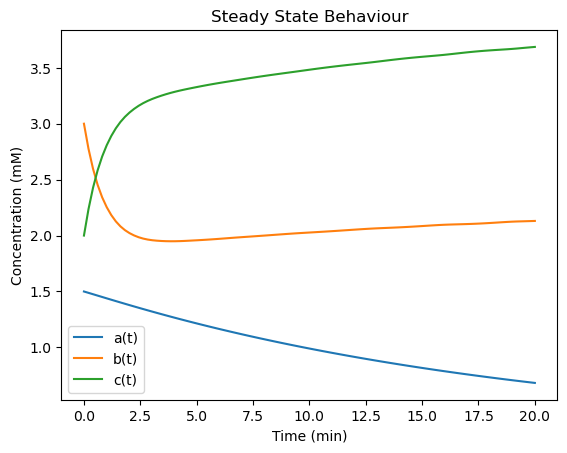

In [51]:
plt.plot(solution1.t, solution1.y[0], label='a(t)')
plt.plot(solution1.t, solution1.y[1], label='b(t)')
plt.plot(solution1.t, solution1.y[2], label='c(t)')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mM)')
plt.title('Steady State Behaviour')
plt.legend()
plt.show()

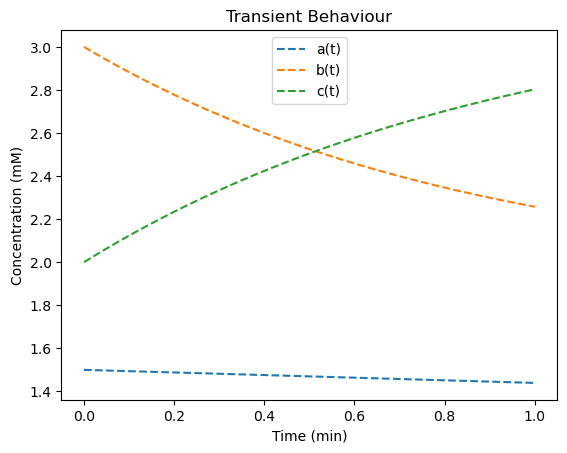

In [52]:

plt.plot(solution2.t, solution2.y[0], label='a(t)', linestyle='dashed')
plt.plot(solution2.t, solution2.y[1], label='b(t)', linestyle='dashed')
plt.plot(solution2.t, solution2.y[2], label='c(t)', linestyle='dashed')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mM)')
plt.title('Transient Behaviour')
plt.legend()
plt.show()

(c)

In [53]:
def reduced_system(t, y):
    dydt = [-7/10 * y[0] + 0.4 * y[1], 7/10 * y[0] - 0.4 * y[1]]
    return dydt

In [59]:
y_0_reduced = [4.5, 2]
time_scale = 20
sampling_rate = 1000
t_span1 = (0, time_scale)
t_span1_reduced = (0, time_scale)  # Time span from 0 to 10

In [60]:
solution1 = solve_ivp(system, t_span1, y0, t_eval=np.linspace(0, time_scale, sampling_rate))
solution1_reduced = solve_ivp(reduced_system, t_span1_reduced, y_0_reduced, t_eval=np.linspace(0, time_scale, sampling_rate))

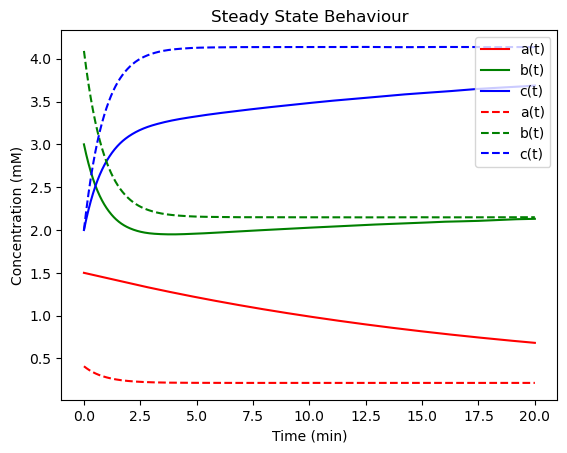

In [61]:
plt.plot(solution1.t, solution1.y[0], label='a(t)', color='red')
plt.plot(solution1.t, solution1.y[1], label='b(t)', color='green')
plt.plot(solution1.t, solution1.y[2], label='c(t)', color='blue')

plt.plot(solution1_reduced.t, 1/11*solution1_reduced.y[0], label='a(t)', linestyle='dashed', color='red')
plt.plot(solution1_reduced.t, 10/11*solution1_reduced.y[0], label='b(t)', linestyle='dashed', color='green')
plt.plot(solution1_reduced.t, solution1_reduced.y[1], label='c(t)', linestyle='dashed', color='blue')

plt.xlabel('Time (min)')
plt.ylabel('Concentration (mM)')
plt.title('Steady State Behaviour')
plt.legend()
plt.show()